## Раздел 2. Анализ источников


Выбранный инструмент для работы с данными: **Python**

1. Встроенные функции для статистического анализа, простота статистических расчетов
2. Эффективная работа с аномалиями
3. Простое объединение разнородных данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# Загрузка файлов

df_Money = pd.read_csv('Money.csv')
df_Cheaters = pd.read_csv('Cheaters.csv')  
df_Platforms = pd.read_csv('Platforms.csv')
df_Cash = pd.read_csv('Cash.csv')
df_ABGroup = pd.read_csv('ABgroup.csv')

### Информация по датафреймам

In [4]:
df_Money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640000 entries, 0 to 8639999
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  object 
 1   date     object 
 2   money    float64
dtypes: float64(1), object(2)
memory usage: 197.8+ MB


In [5]:
df_Cheaters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640000 entries, 0 to 8639999
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   object
 1   cheaters  int64 
dtypes: int64(1), object(1)
memory usage: 131.8+ MB


In [6]:
df_Platforms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640000 entries, 0 to 8639999
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   object
 1   platform  object
dtypes: object(2)
memory usage: 131.8+ MB


In [7]:
df_Cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640000 entries, 0 to 8639999
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   date     object
 2   cash     int64 
dtypes: int64(1), object(2)
memory usage: 197.8+ MB


In [8]:
df_ABGroup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640000 entries, 0 to 8639999
Data columns (total 2 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   group    object
dtypes: object(2)
memory usage: 131.8+ MB


**Итого:**

Каждый датафрейм содержит 8.640.000 строк.  
В таблицах нет пустых значений.

### Первые 5 строк каждого датафрейма

In [16]:
df_Money.head()

,user_id,date,money
0,N4TS2T-P7YTVX,15.07.2021,1.99
1,NX9S0D-VM20W8,16.07.2021,0.99
2,QYY6FW-FKHRND,15.07.2021,0.00
3,BRWH4Y-LPGBU6,14.07.2021,0.00
4,8O317F-4ASK53,13.07.2021,0.00


In [17]:
df_Cheaters.head()

,user_id,cheaters
0,TWLWB9-L19SYJ,0
1,SD0L4U-1JG4WN,0
2,QZVG35-P8JKNU,0
3,S2VBV4-ZKBHI6,0
4,DDGKMQ-45SP8R,0


In [18]:
df_Platforms.head()

,user_id,platform
0,NHFL0F-Y90OSH,XBox
1,MVPNHS-PBHB8S,XBox
2,1UWMRN-8NVCLI,PC
3,EHO5II-03X9PU,PS4
4,7C5ZAE-D1NCY9,XBox


In [19]:
df_Cash.head()

,user_id,date,cash
0,GGLSXL-U5BGGY,17.07.2021,200
1,DPWFFN-NL3VF8,16.07.2021,150
2,PASNNG-GVW4RR,11.07.2021,1100
3,4F0AW7-F40GY9,15.07.2021,1050
4,CEY6AF-YTSM4V,15.07.2021,150


In [20]:
df_ABGroup.head()

,user_id,group
0,VX6NLA-F5YMSW,control
1,2AXN3D-71ZN86,test
2,K78V3J-TQMV6F,test
3,Z2KEIG-LY3V4H,test
4,ND92RZ-SHG980,control


#### Удаление дубликатов

Удаление дубликатов производится в таблицах с обнаруженными читерами, игровыми платформами, распределением игроков по группам теста.
Мы не можем удалять дубликаты в таблице с платежами, т.к. платежей одним игроком может быть совершено много и повторение строк не будет дублем. Аналогично с таблицей трат внутриигровой валюты.

In [4]:
# Удаление дубликатов

df_ABGroup.drop_duplicates(subset=['user_id', 'group'], inplace=True)
df_Platforms.drop_duplicates(subset=['user_id', 'platform'], inplace=True)
df_Cheaters.drop_duplicates(subset=['user_id', 'cheaters'], inplace=True)

In [5]:
# Размер датафреймов после удаления дубликатов

print(df_Cheaters.shape)
print(df_Platforms.shape)
print(df_ABGroup.shape)

(1080000, 2)
(1080000, 2)
(1080000, 2)


### Объединение таблиц

Перед объединением таблиц **Money** и **Cash** проанализируем их:
1. Узнаем количество уникальных пар (***user_id***, ***date***) в каждой таблице.
2. Узнаем, есть ли в таблицах пользователи с нулевыми значениями по платежам.

In [23]:
# Для Money

unique_pairs_money = df_Money.groupby(['user_id', 'date']).ngroups
print(f"Уникальных пар (user_id, date): {unique_pairs_money}")

money_zeros = df_Money['money'] == 0
print(f"Нулевые значения: {money_zeros.sum()} записей")

Уникальных пар (user_id, date): 8640000
Нулевые значения: 3626397 записей


In [24]:
# Для Cash

unique_pairs_cash = df_Cash.groupby(['user_id', 'date']).ngroups
print(f"Уникальных пар (user_id, date): {unique_pairs_cash}")

cash_zeros = df_Cash['cash'] == 0
print(f"Нулевые значения: {cash_zeros.sum()} записей")

Уникальных пар (user_id, date): 8640000
Нулевые значения: 1111337 записей


---
Т.к. количество уникальных пар (***user_id***, ***date***) совпадает с количеством записей в каждом датафрейме, а также в датафреймах есть значительное количество пользователей с нулевыми значениями платежей и трат внутриигровой валюты, то можно сделать **вывод**, что
1. данные выгружались по каждому пользователю, вне зависимости от того совершал он платежи или траты валюты в этот день или нет,
2. каждому пользователю соответствует только одна сумма платежей и трат в конкретный день (то есть суммарный платеж или трата валюты за день).

Это значит, что датафреймы можно объединить методом .merge, не боясь, что данные по каким-либо пользователям потеряются, а также платежи не будут дублироваться, т.к. для каждого пользователя в определенную дату есть только один платеж и одна трата валюты.

In [6]:
# Объединение Money и Cash

df_1 = df_Money.merge(df_Cash, on=["user_id", "date"])

In [7]:
# Объединение оставшихся таблиц

df_2 = df_1.merge(df_Platforms, on="user_id", how="left")
df_3 = df_2.merge(df_ABGroup, on="user_id", how="left")
df_all = df_3.merge(df_Cheaters, on="user_id", how="left")

In [8]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640000 entries, 0 to 8639999
Data columns (total 7 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   object 
 1   date      object 
 2   money     float64
 3   cash      int64  
 4   platform  object 
 5   group     object 
 6   cheaters  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 461.4+ MB


In [9]:
df_all.head()

,user_id,date,money,cash,platform,group,cheaters
0,N4TS2T-P7YTVX,15.07.2021,1.99,1150,PS4,test,0
1,NX9S0D-VM20W8,16.07.2021,0.99,1500,XBox,test,0
2,QYY6FW-FKHRND,15.07.2021,0.00,200,XBox,control,0
3,BRWH4Y-LPGBU6,14.07.2021,0.00,300,PC,test,0
4,8O317F-4ASK53,13.07.2021,0.00,900,PC,control,0


---
В итоговом датафрейме нет пустых значений, значит каждому пользователю из таблиц **Money** и **Cash** нашлось значение ***platform***, ***group***, ***cheaters***.

**Итоговую таблицу можно считать корректной для дальнейшей работы с данными и их анализа.**

In [10]:
# Статистические показатели

df_all.describe([.5, .75, .99])

,money,cash,cheaters
count,8.640000e+06,8.640000e+06,8.640000e+06
mean,7.489878e-01,7.634015e+02,3.268519e-04
std,7.922920e-01,8.836145e+02,1.807609e-02
min,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.900000e-01,7.000000e+02,0.000000e+00
75%,9.900000e-01,1.150000e+03,0.000000e+00
99%,2.990000e+00,3.150000e+03,0.000000e+00
max,9.990000e+00,1.482000e+05,1.000000e+00


#### Анализ статистических показателей

**По Money**  
1. Среднее - 0,75, медиана - 0,99, значит много игроков в какие-либо дни не совершают оплаты
2. 50-й и 75-й перцентили совпадают и равны 0,99, значит от 50% до 75% игроков платят фиксированную сумму, минимальный платеж 0,99
3. 1% игроков платит от 2,99 до 9,99
4. Стандартное отклонение 0,79 также говорит о том, что почти все платежи в диапазоне от 0 до 1,54 (или нулевые, или 0,99)

**По Cash**  
1. Среднее - 763, медиана - 700. Несмотря на наличие нулевых значений трат (1111337 записей, как выявлено выше), значение среднего завышено из-за аномально высоких значений трат валюты читеров
2. 50-й и 75-й перцентили: 700 и 1150, т.е. большинство игроков тратят до 1150
3. 75-й и 99-й перцентили: 1150 и 3150, большая группа игроков тратит в 1,5-4,5 раза больше 700 (медианы) и 763 (среднего)
4. Максимум (148200) в 47 раз больше 99-го перцентиля (3150) говорит о наличии аномалий
5. Стандартное отклонение 883 также говорит о том, что почти все траты в диапазоне от 0 до 1646

In [29]:
# Сохранение объединенного файла

df_all.to_csv('All.csv', index=False)

## Раздел 3. Очистка данных


In [19]:
# Загрузка объединенного файла

df_all = pd.read_csv('All.csv')

In [20]:
# Агрегируем данные, чтобы оценивать суммарные показатели по каждому игроку для поиска читеров

df_all_grouped1 = df_all.groupby('user_id').agg({
    'money': 'sum',
    'cash': 'sum', 
    'cheaters': 'max'
}).reset_index()

In [21]:
# Создание датафрейма с обнаруженными читерами для анализа данных по ним

df_cheaters_detected = df_all_grouped1[df_all_grouped1['cheaters'] == 1].copy()

In [22]:
df_cheaters_detected.describe([.5, .75, .99])

,money,cash,cheaters
count,353.0,353.000000,353.0
mean,0.0,146807.932011,1.0
std,0.0,33800.925081,0.0
min,0.0,46700.000000,1.0
50%,0.0,147200.000000,1.0
75%,0.0,169700.000000,1.0
99%,0.0,224654.000000,1.0
max,0.0,253150.000000,1.0


### Вывод:
Читеры вообще не совершают платежей, значит новых читеров будем выявлять среди игроков, у которых ***money == 0*** или близко к этому значению.

In [23]:
# Очистим датафрейм по всем игрокам от выявленных читеров

df_without_ch_detected = df_all_grouped1[df_all_grouped1['cheaters'] != 1].copy()

In [24]:
df_without_ch_detected.describe([.5, .75, .99])

,money,cash,cheaters
count,1.079647e+06,1.079647e+06,1079647.0
mean,5.993862e+00,6.061209e+03,0.0
std,1.902327e+00,3.004201e+03,0.0
min,0.000000e+00,5.000000e+01,0.0
50%,5.950000e+00,6.000000e+03,0.0
75%,6.950000e+00,6.950000e+03,0.0
99%,1.093000e+01,9.350000e+03,0.0
max,1.693000e+01,2.409500e+05,0.0


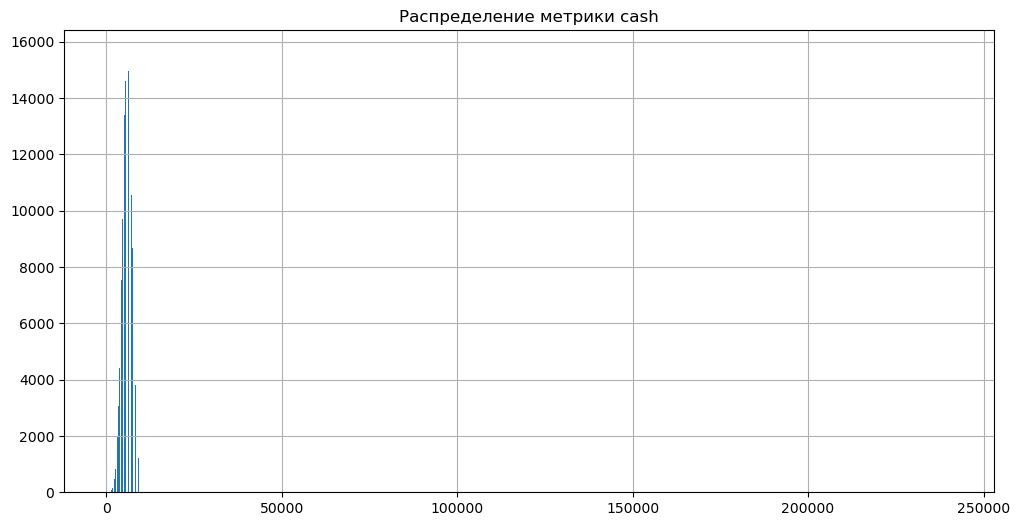

In [25]:
# Построим гистограмму распределения cash по игрокам

plt.figure(figsize=(12, 6))
df_without_ch_detected.cash.hist(bins='auto')
plt.title("Распределение метрики cash")
plt.savefig('Распределение метрики cash (с невыявленными читерами).png',
            dpi=300, bbox_inches='tight')
plt.show()

### Выводы:
1. Видим, что распределение близко к нормальному, но аномальные значения ***cash*** делают пик очень острым.
2. Есть две группы пользователей, одна из которых бОльшая, а другая - с аномально высокими значениями трат валюты. Предположительно это и есть читеры.
3. Для подтверждения предположения разделим пользователей на две группы. Для этого определим границу разделения по ***cash*** с помощью правила трех сигм.

In [26]:
cash_mean = df_without_ch_detected['cash'].mean()
cash_std = df_without_ch_detected['cash'].std()

upper_limit = cash_mean + 3 * cash_std
print(f"Граница разделения групп пользователей: {upper_limit}")

Граница разделения групп пользователей: 15073.811680210403


In [27]:
# Первая группа. Построим гистограмму распределения

df_cash_up_to_15k = df_without_ch_detected[
    df_without_ch_detected['cash'] <= upper_limit
].copy()

In [10]:
# Функция расчета bins для гистограммы

def calculate_bins(df):
    n = len(df)
    sturges_bins = int(1 + 3.322 * np.log10(n))
    return sturges_bins

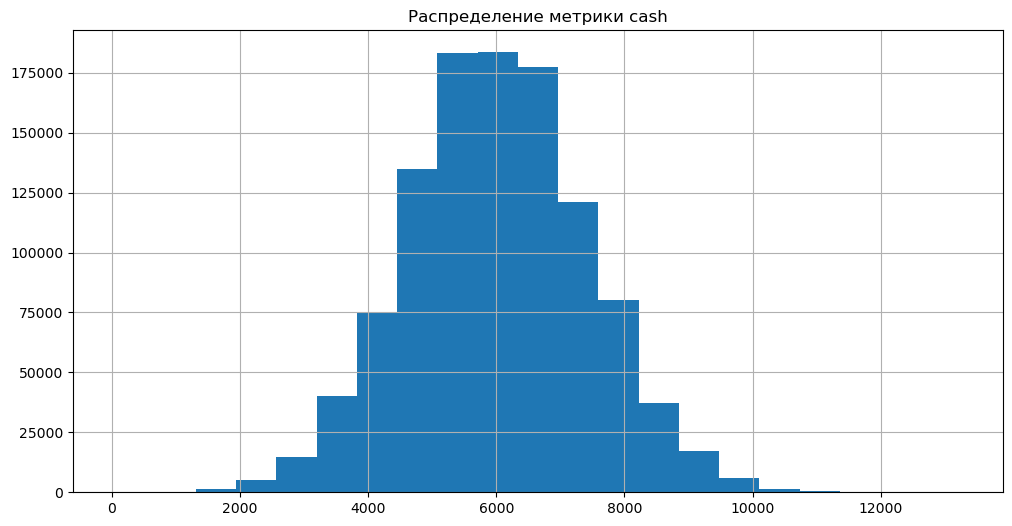

In [28]:
plt.figure(figsize=(12, 6))
df_cash_up_to_15k.cash.hist(bins=calculate_bins(df_cash_up_to_15k))
plt.title("Распределение метрики cash")
plt.savefig('Распределение метрики cash (без читеров).png',
            dpi=300, bbox_inches='tight')
plt.show()

In [21]:
# Вторая группа. Отобразим статистические показатели для подтверждения предположения о том, что это читеры

df_cash_more_than_15k = df_without_ch_detected[
    df_without_ch_detected['cash'] >= upper_limit
].copy()

df_cash_more_than_15k.describe([.5, .75, .99])

,money,cash,cheaters
count,344.0,344.000000,344.0
mean,0.0,150992.005814,0.0
std,0.0,34665.308127,0.0
min,0.0,20700.000000,0.0
50%,0.0,150125.000000,0.0
75%,0.0,175837.500000,0.0
99%,0.0,228471.500000,0.0
max,0.0,240950.000000,0.0


### Выводы:
1. Видим, что минимальное значение ***cash*** этой группы 20700 - значительно выше медианы общего датафрейма после первого удаления читеров (6000).
2. При этом платежей ***money*** нет ни у одного игрока.
3. Следовательно игроки этой группы - читеры.
4. Дальнейшая работа с данными будет вестись для первой группы ***df_cash_up_to_15k***

In [24]:
# Удаление читеров из объединенного файла

df_all_clean = df_all.merge(
    df_cash_up_to_15k[['user_id']], 
    on='user_id', 
    how='inner'
)

In [25]:
df_all_clean.describe([.5, .75, .99])

,money,cash,cheaters
count,8.634424e+06,8.634424e+06,8634424.0
mean,7.494715e-01,7.518770e+02,0.0
std,7.923190e-01,6.402135e+02,0.0
min,0.000000e+00,0.000000e+00,0.0
50%,9.900000e-01,7.000000e+02,0.0
75%,9.900000e-01,1.150000e+03,0.0
99%,2.990000e+00,3.100000e+03,0.0
max,9.990000e+00,9.000000e+03,0.0


In [172]:
# Сохранение файла

df_all_clean.to_csv('All_clean.csv', index=False)

## Раздел 4. Использование статистических методов


In [3]:
# Загрузка файла

df_all_clean = pd.read_csv('All_clean.csv')

In [4]:
# Агрегируем данные, чтобы оценивать суммарные показатели по каждому игроку

df_users_clean = df_all_clean.groupby('user_id').agg({
    'money': 'sum',
    'cash': 'sum',
    'platform': 'first',
    'group': 'first'
}).reset_index()

In [5]:
# Создадим три датафрейма с данными по каждой игровой платформе

df_users_clean_pc = df_users_clean[df_users_clean['platform'] == 'PC'].copy()
df_users_clean_ps4 = df_users_clean[df_users_clean['platform'] == 'PS4'].copy()
df_users_clean_xbox = df_users_clean[df_users_clean['platform'] == 'XBox'].copy()

### Расчет метрик ARPU, ARPPU, avg_cash

1. **ARPU** - средняя прибыль на игрока, **ARPPU** - средняя прибыль на платящего игрока и **avg_cash** - средние траты внутриигровой валюты.
2. Для анализа необходимо найти и сравнить метрики для тестовой и контрольной групп. Сравнение будем проводить по группам: первая группа - общие показатели, и три группы - показатели по конкретным игровым платформам.
3. Далее построим гистограммы распределения метрик ***money*** и ***cash*** по игрокам и отметим на этим гистограммах значения средних и доверительные интервалы от них с точностью 95%.

In [6]:
# Создадим функцию для расчета метрик

def calculate_metrics(df):
    # Количество пользователей по группам
    control_total_users = len(df[df['group'] == 'control'])
    test_total_users = len(df[df['group'] == 'test'])
    
    # Сумма платежей по группам
    control_total_money = df[df['group'] == 'control']['money'].sum()
    test_total_money = df[df['group'] == 'test']['money'].sum()
    
    # Платящие пользователи по группам
    control_paying_users = len(df[(df['group'] == 'control') & (df['money'] > 0)])
    test_paying_users = len(df[(df['group'] == 'test') & (df['money'] > 0)])
    
    # Средние траты cash по группам
    control_avg_cash = df[df['group'] == 'control']['cash'].mean()
    test_avg_cash = df[df['group'] == 'test']['cash'].mean()
    
    # Расчет ARPU и ARPPU
    control_arpu = control_total_money / control_total_users
    test_arpu = test_total_money / test_total_users
    
    control_arppu = control_total_money / control_paying_users
    test_arppu = test_total_money / test_paying_users

    # Создаем датафрейм с метриками
    metrics_df = pd.DataFrame({
        'group': ['control', 'test'],
        'arpu': [control_arpu, test_arpu],
        'arppu': [control_arppu, test_arppu],
        'avg_cash': [control_avg_cash, test_avg_cash],
    })
    
    return metrics_df

In [7]:
# Вычисляем метрики для всех групп
metrics_general = calculate_metrics(df_users_clean)
metrics_pc = calculate_metrics(df_users_clean_pc)
metrics_ps4 = calculate_metrics(df_users_clean_ps4)
metrics_xbox = calculate_metrics(df_users_clean_xbox)

# Добавляем столбец с названием платформы
metrics_general['platform'] = 'Общие'
metrics_pc['platform'] = 'PC'
metrics_ps4['platform'] = 'PS4'
metrics_xbox['platform'] = 'XBox'

# Объединяем все датафреймы
df_metrics = pd.concat([metrics_general, metrics_pc, metrics_ps4, metrics_xbox])

# Устанавливаем мультииндекс
df_metrics = df_metrics.set_index(['platform', 'group'])

df_metrics

arpu     arppu     avg_cash
platform group                                   
Общие    control  5.829478  5.831109  5800.705382
         test     6.162276  6.163144  6229.596319
PC       control  5.646201  5.648307  5587.102185
         test     6.269046  6.269743  6381.745635
PS4      control  5.737647  5.739466  5681.936164
         test     6.084883  6.085866  6130.493270
XBox     control  6.103521  6.104434  6131.793522
         test     6.132766  6.133686  6176.402872

In [28]:
# Сохранение файла

df_metrics.to_csv('Metrics.csv')

### Выводы:
1. Акция оказала положительное влияние на все метрики. Тестовая группа показывает лучшие результаты.
   - **PC**
        -  ARPU: +11.0%
        -  ARPPU: +11.0%
        -  avg_cash: +14.2%
    - **PS4**
        -  ARPU: +6.1%
        -  ARPPU: +6.0%
        -  avg_cash: +7.9%
    - **XBox**
        -  ARPU: +0.5%
        -  ARPPU: +0.5%
        -  avg_cash: +0.7%
**Вывод:** На PC акция сработала лучше всего. На XBox акция практически не повлияла.

2. Заметим, что значения ARPU и ARPPU для каждой группы близки. Причина в том, что практически все игроки являются платящими, т.е. за весь период наблюдений практически каждый игрок совершал платеж хотя бы один раз. Поэтому далее при построении гистограмм распределения метрик money и cash будем рассматривать только одну из метрик - ARPU.

3. Далее создадим функцию для построения графиков  
   ***histogram_constructing(df, platform_name, metric_column)***, где  
   - ***df*** - датафрейм с данными группы (общие данные или по платформам):  
       -  *df_users_clean*  
       -  *df_users_clean_pc*  
       -  *df_users_clean_ps4*  
       -  *df_users_clean_xbox*  
   - ***platform_name*** - платформа:  
       -  *'Общие'*  
       -  *'PC'*  
       -  *'PS4'*  
       -  *'XBox'*  
   - ***metric_column*** - колонка с данными, по которым будут строиться гистограммы. Т.е. платежи или траты валюты:  
       -  *'money'*  
       -  *'cash'*
4. Для каждого графика выведем численные значения доверительных интервалов.

In [8]:
# Создадим функцию для построения графиков

def histogram_constructing(df, platform_name, metric_column, save_image=False):
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy import stats
    
    # Фильтруем группы
    control_group = df[df['group'] == 'control']
    test_group = df[df['group'] == 'test']
    
    # Вычисляем доверительные интервалы
    control_confidence = stats.norm.interval(0.95, loc=control_group[metric_column].mean(), scale=control_group[metric_column].sem())
    test_confidence = stats.norm.interval(0.95, loc=test_group[metric_column].mean(), scale=test_group[metric_column].sem())
    
    # Строим график
    plt.figure(figsize=(12, 6))
    
    # Гистограммы
    plt.hist(control_group[metric_column], bins=calculate_bins(df), alpha=0.3, label='Control группа', color='blue', density=True)
    plt.hist(test_group[metric_column], bins=calculate_bins(df), alpha=0.3, label='Test группа', color='red', density=True)
    
    # ARPU или avg_cash
    if metric_column == 'money':
        control_metric = df_metrics.loc[(platform_name, 'control'), 'arpu']
        test_metric = df_metrics.loc[(platform_name, 'test'), 'arpu']
        control_label = f'Control ARPU: {control_metric:.2f}'
        test_label = f'Test ARPU: {test_metric:.2f}'

    else:
        control_metric = df_metrics.loc[(platform_name, 'control'), 'avg_cash']
        test_metric = df_metrics.loc[(platform_name, 'test'), 'avg_cash']
        control_label = f'Control avg_cash: {control_metric:.2f}'
        test_label = f'Test avg_cash: {test_metric:.2f}'
    plt.axvline(control_metric, color='blue', linestyle='-', linewidth=3, label=control_label)
    plt.axvline(test_metric, color='red', linestyle='-', linewidth=3, label=test_label)
    
    # Доверительные интервалы
    plt.axvline(control_confidence[1], color='blue', linestyle='--', linewidth=2, alpha=0.7, label=f'Control 95% ДИ')
    plt.axvline(control_confidence[0], color='blue', linestyle='--', linewidth=2, alpha=0.7)
    plt.axvline(test_confidence[1], color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'Test 95% ДИ')
    plt.axvline(test_confidence[0], color='red', linestyle='--', linewidth=2, alpha=0.7)

    # Определяем заголовок и подписи
    if metric_column == 'money':
        title = f'Распределение платежей ({platform_name}) с ARPU и 95% доверительными интервалами'
        xlabel = 'Платежи (money)'
    else:
        title = f'Распределение трат внутриигровой валюты ({platform_name}) с 95% доверительными интервалами'
        xlabel = 'Траты внутриигровой валюты (cash)'
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Плотность')
    plt.legend()
    plt.grid(True, alpha=0.5)
    plt.tight_layout()
    
    filename = f'histogram_{platform_name}_{metric_column}.png'
    if save_image:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    plt.show()

    print(f"{control_label}, 95% ДИ: [{control_confidence[0]:.4f}, {control_confidence[1]:.4f}]")
    print(f"{test_label}, 95% ДИ: [{test_confidence[0]:.4f}, {test_confidence[1]:.4f}]")

### Гистограммы распределения платежей (money)

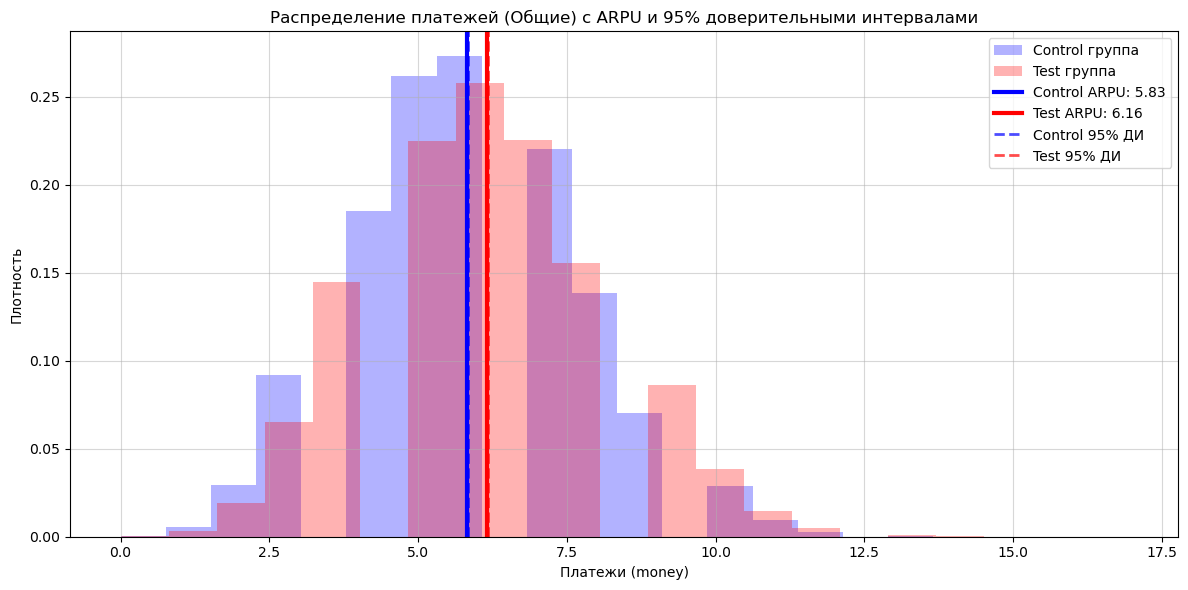

Control ARPU: 5.83, 95% ДИ: [5.8245, 5.8345]
Test ARPU: 6.16, 95% ДИ: [6.1572, 6.1674]


In [11]:
# График "Распределение платежей с ARPU и 95% доверительными интервалами"

histogram_constructing(df_users_clean, 'Общие', 'money', save_image=True)

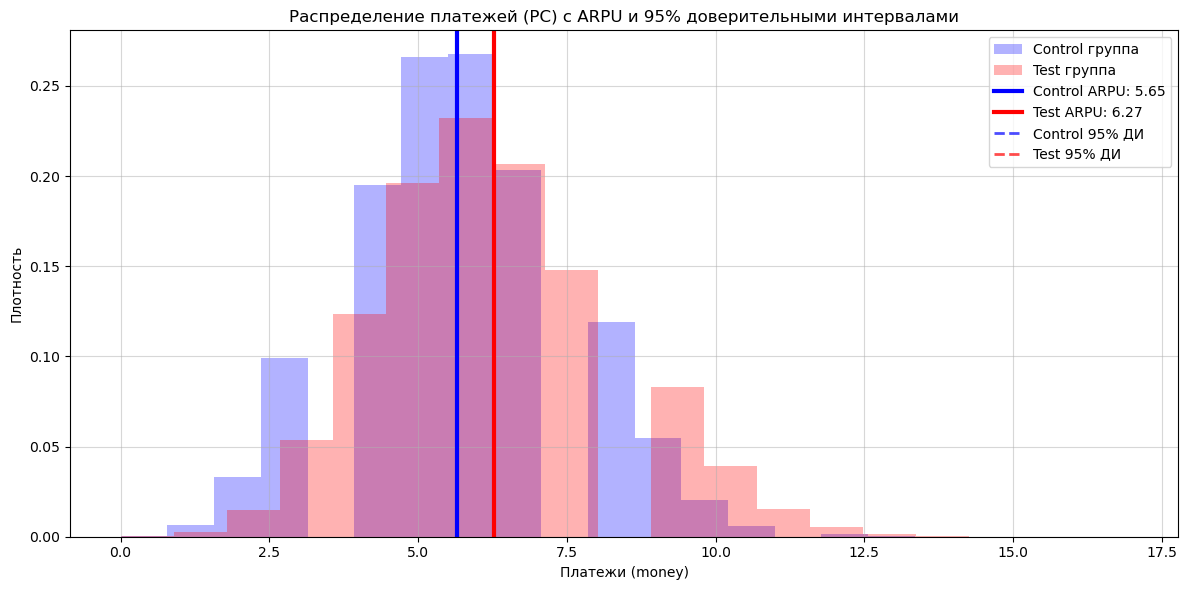

Control ARPU: 5.65, 95% ДИ: [5.6378, 5.6546]
Test ARPU: 6.27, 95% ДИ: [6.2601, 6.2780]


In [12]:
# График "Распределение платежей (PC) с ARPU и 95% доверительными интервалами"

histogram_constructing(df_users_clean_pc, 'PC', 'money', save_image=True)

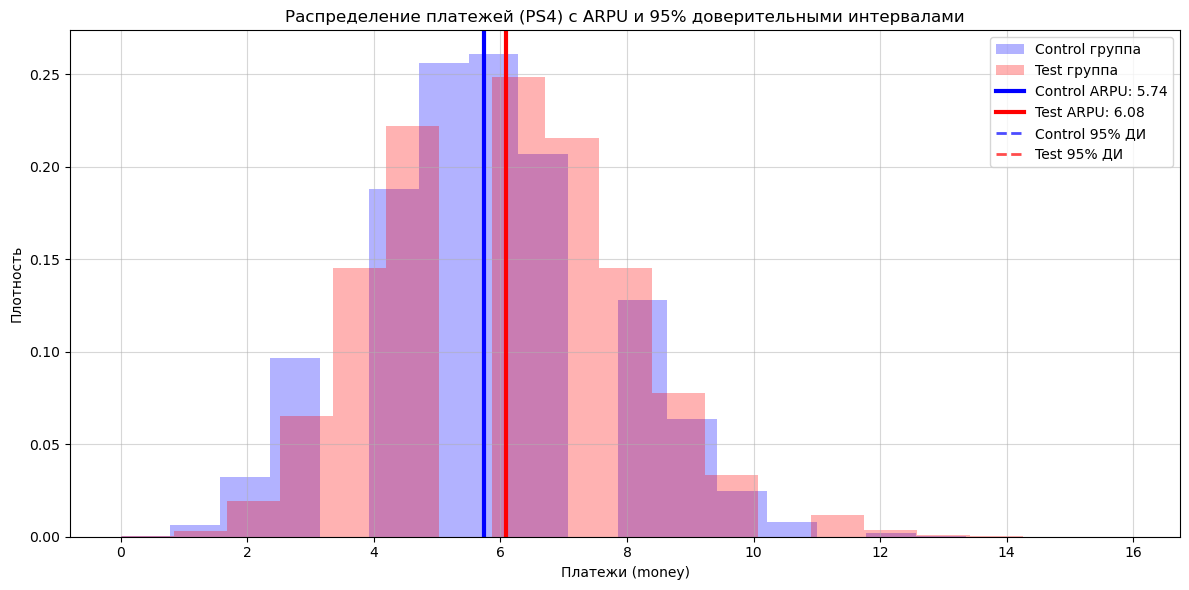

Control ARPU: 5.74, 95% ДИ: [5.7290, 5.7463]
Test ARPU: 6.08, 95% ДИ: [6.0762, 6.0936]


In [13]:
# График "Распределение платежей (PS4) с ARPU и 95% доверительными интервалами"

histogram_constructing(df_users_clean_ps4, 'PS4', 'money', save_image=True)

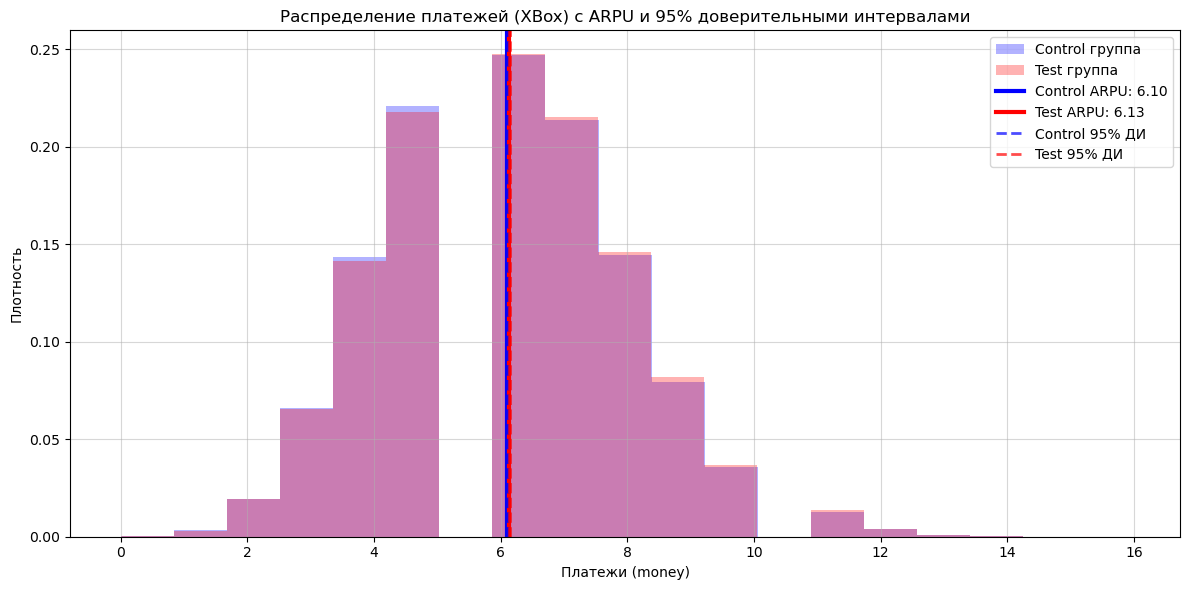

Control ARPU: 6.10, 95% ДИ: [6.0947, 6.1123]
Test ARPU: 6.13, 95% ДИ: [6.1239, 6.1416]


In [14]:
# График "Распределение платежей (XBox) с ARPU и 95% доверительными интервалами"

histogram_constructing(df_users_clean_xbox, 'XBox', 'money', save_image=True)

### Гистограммы распределения трат внутриигровой валюты (cash)

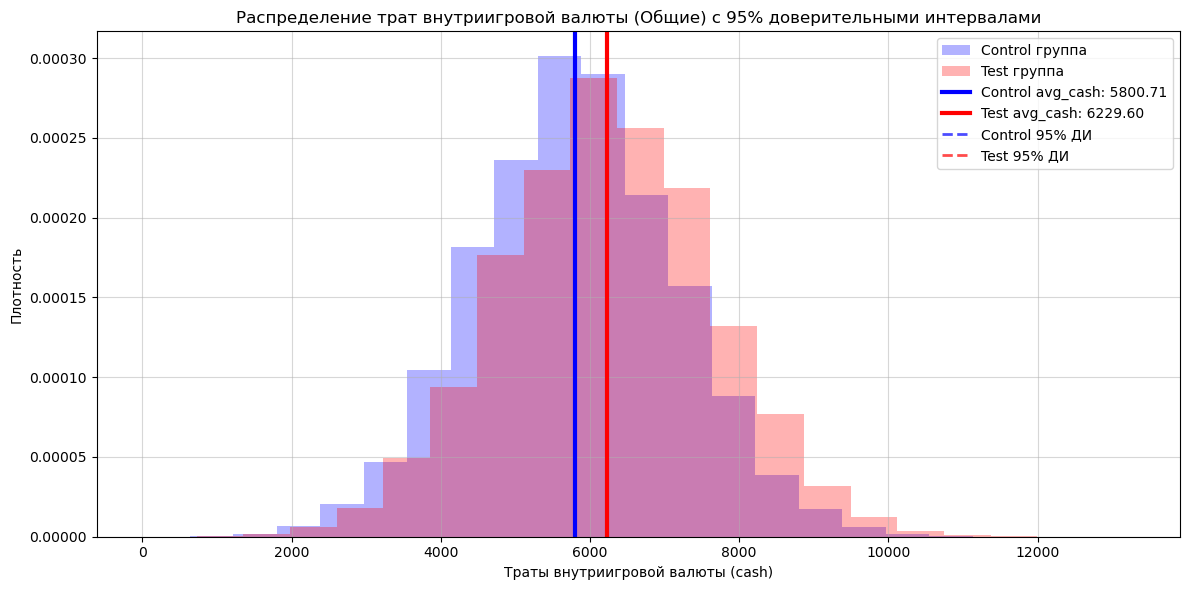

Control avg_cash: 5800.71, 95% ДИ: [5797.1124, 5804.2983]
Test avg_cash: 6229.60, 95% ДИ: [6225.8295, 6233.3632]


In [15]:
# График "Распределение трат внутриигровой валюты с 95% доверительными интервалами"

histogram_constructing(df_users_clean, 'Общие', 'cash', save_image=True)

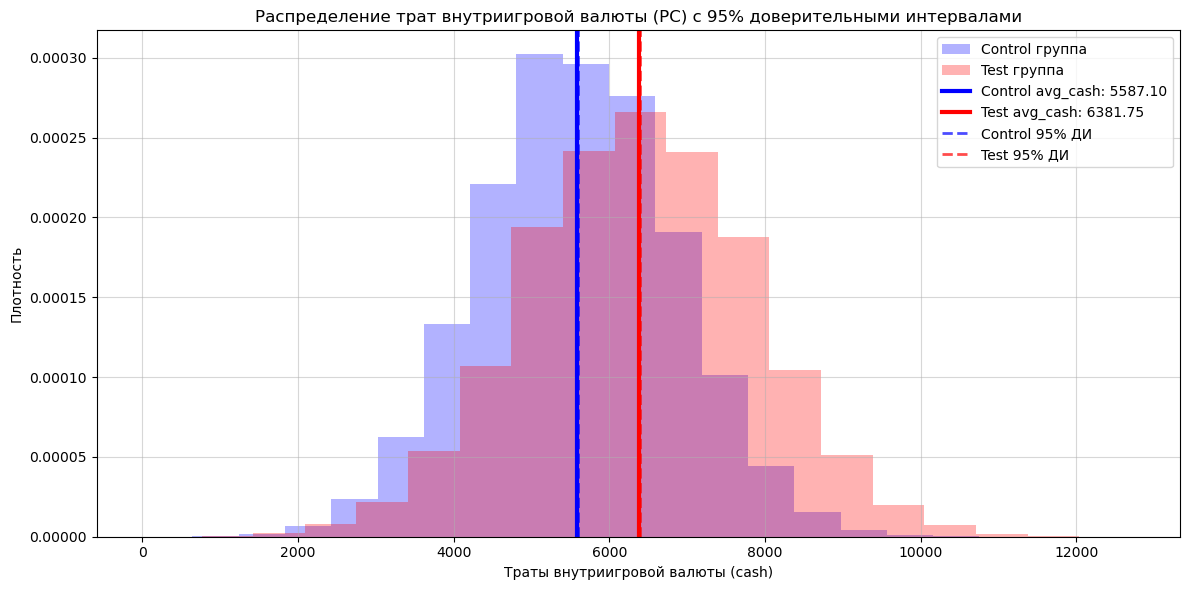

Control avg_cash: 5587.10, 95% ДИ: [5581.3767, 5592.8277]
Test avg_cash: 6381.75, 95% ДИ: [6375.0147, 6388.4765]


In [16]:
# График "Распределение трат внутриигровой валюты (PC) с 95% доверительными интервалами"

histogram_constructing(df_users_clean_pc, 'PC', 'cash', save_image=True)

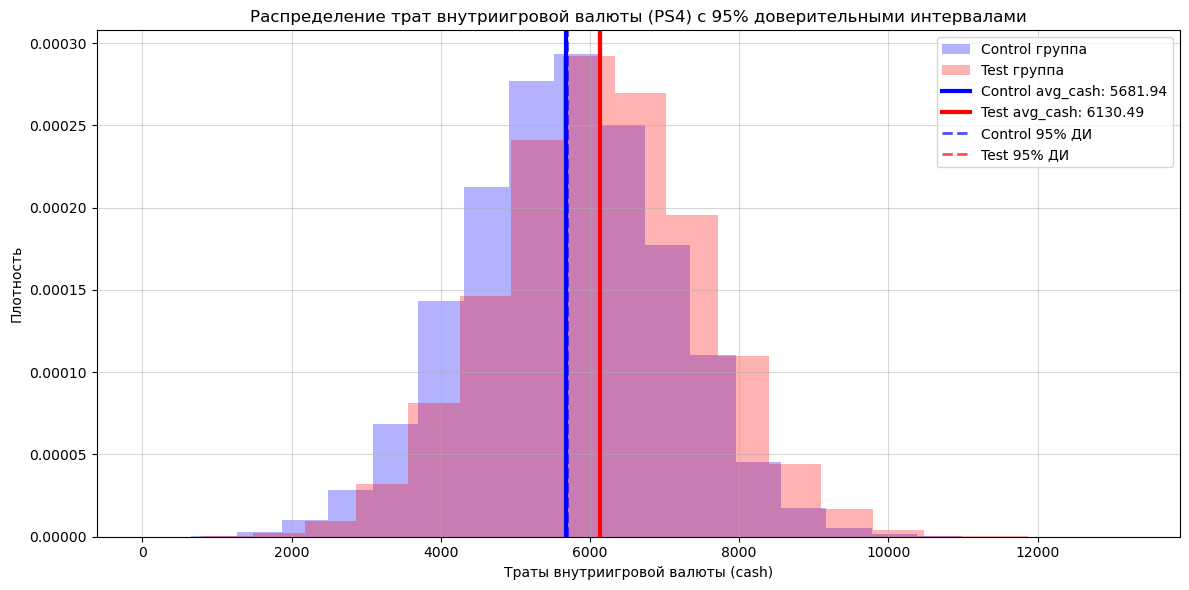

Control avg_cash: 5681.94, 95% ДИ: [5675.7683, 5688.1040]
Test avg_cash: 6130.49, 95% ДИ: [6124.1899, 6136.7966]


In [17]:
# График "Распределение трат внутриигровой валюты (PS4) с 95% доверительными интервалами"

histogram_constructing(df_users_clean_ps4, 'PS4', 'cash', save_image=True)

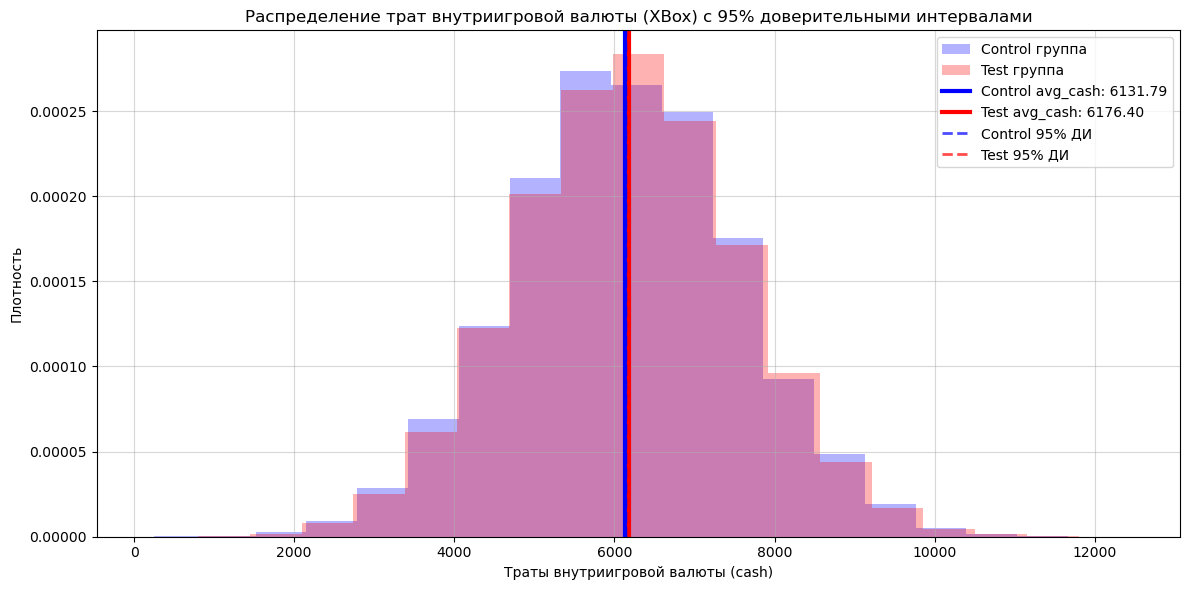

Control avg_cash: 6131.79, 95% ДИ: [6125.3354, 6138.2516]
Test avg_cash: 6176.40, 95% ДИ: [6169.9305, 6182.8752]


In [18]:
# График "Распределение трат внутриигровой валюты (XBox) с 95% доверительными интервалами"

histogram_constructing(df_users_clean_xbox, 'XBox', 'cash', save_image=True)

In [55]:
# Возьмем за основу функцию для построения гистограмм для построения гистограммы с увеличенным масштабом

def histogram_constructing_scale(df, platform_name, metric_column, save_image=False):
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy import stats
    
    # Фильтруем группы
    control_group = df[df['group'] == 'control']
    test_group = df[df['group'] == 'test']
    
    # Вычисляем доверительные интервалы
    control_confidence = stats.norm.interval(0.95, loc=control_group[metric_column].mean(), scale=control_group[metric_column].sem())
    test_confidence = stats.norm.interval(0.95, loc=test_group[metric_column].mean(), scale=test_group[metric_column].sem())
    
    # Строим график
    plt.figure(figsize=(12, 6))
    
    # Гистограммы
    plt.hist(control_group[metric_column], bins=calculate_bins(df), alpha=0.3, label='Control группа', color='blue', density=True)
    plt.hist(test_group[metric_column], bins=calculate_bins(df), alpha=0.3, label='Test группа', color='red', density=True)
    
    # ARPU или avg_cash
    if metric_column == 'money':
        control_metric = df_metrics.loc[(platform_name, 'control'), 'arpu']
        test_metric = df_metrics.loc[(platform_name, 'test'), 'arpu']
        control_label = f'Control ARPU: {control_metric:.2f}'
        test_label = f'Test ARPU: {test_metric:.2f}'

    else:
        control_metric = df_metrics.loc[(platform_name, 'control'), 'avg_cash']
        test_metric = df_metrics.loc[(platform_name, 'test'), 'avg_cash']
        control_label = f'Control avg_cash: {control_metric:.2f}'
        test_label = f'Test avg_cash: {test_metric:.2f}'
    plt.axvline(control_metric, color='blue', linestyle='-', linewidth=3, label=control_label)
    plt.axvline(test_metric, color='red', linestyle='-', linewidth=3, label=test_label)
    
    # Доверительные интервалы
    plt.axvline(control_confidence[1], color='blue', linestyle='--', linewidth=2, alpha=0.7, label=f'Control 95% ДИ')
    plt.axvline(control_confidence[0], color='blue', linestyle='--', linewidth=2, alpha=0.7)
    plt.axvline(test_confidence[1], color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'Test 95% ДИ')
    plt.axvline(test_confidence[0], color='red', linestyle='--', linewidth=2, alpha=0.7)

    # Увеличение масштаба
    if metric_column == 'money':
        x_margin = 0.1
    else:
        x_margin = 15
    plt.xlim([min(control_metric, test_metric) - x_margin, max(control_metric, test_metric) + x_margin])
    
    # Определяем заголовок и подписи
    if metric_column == 'money':
        title = f'Доверительные интервалы ARPU ({platform_name})'
        xlabel = 'Платежи (money)'
    else:
        title = f'Доверительные интервалы средних трат внутриигровой валюты ({platform_name})'
        xlabel = 'Траты внутриигровой валюты (cash)'
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Плотность')
    plt.legend()
    plt.grid(True, alpha=0.5)
    plt.tight_layout()
    
    filename = f'histogram_scale_{platform_name}_{metric_column}.png'
    if save_image:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    plt.show()

    print(f"{control_label}, 95% ДИ: [{control_confidence[0]:.4f}, {control_confidence[1]:.4f}]")
    print(f"{test_label}, 95% ДИ: [{test_confidence[0]:.4f}, {test_confidence[1]:.4f}]")

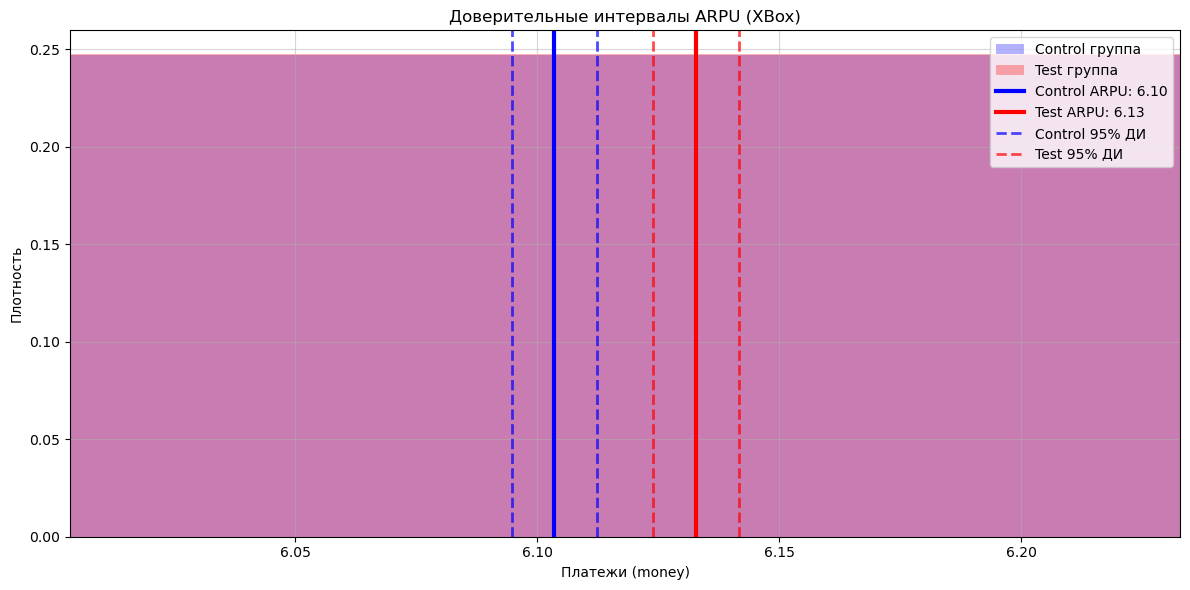

Control ARPU: 6.10, 95% ДИ: [6.0947, 6.1123]
Test ARPU: 6.13, 95% ДИ: [6.1239, 6.1416]


In [53]:
# График "Доверительные интервалы ARPU (XBox)"

histogram_constructing_scale(df_users_clean_xbox, 'XBox', 'money', save_image=True)

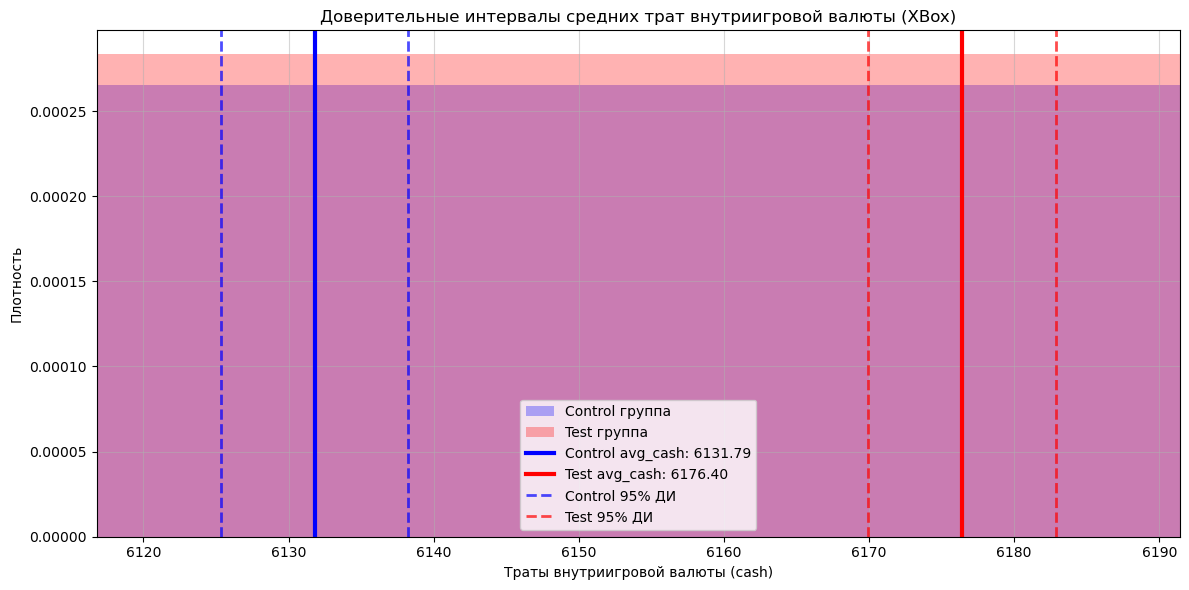

Control avg_cash: 6131.79, 95% ДИ: [6125.3354, 6138.2516]
Test avg_cash: 6176.40, 95% ДИ: [6169.9305, 6182.8752]


In [56]:
# График "Доверительные интервалы средних трат внутриигровой валюты (XBox)"

histogram_constructing_scale(df_users_clean_xbox, 'XBox', 'cash', save_image=True)

### Создание датафрейма с метриками по датам

1. Будем работать с дафтафреймом ***df_all_clean***, который объединяет все записи после очистки от читеров.
2. Добавим столбцы ***paying_users*** и ***users*** для подсчета метрик. В значениях ***paying_users*** прописывается 1, если ***money > 0***; 0, если ***money == 0***. В значениях ***users*** проставляется 1 для всех записей.
3. Создадим два отдельных датафрейма из ***df_all_clean*** под каждую группу: контрольную и тестовую.
4. Агрегируем оба датафрейма по датам. Для получения суммарных значений платежей, трат, количества игроков.
5. Объединим датафреймы снова в один, установив столбцы ***date*** и ***group*** в качестве индексов.
6. Добавим столбцы ***arpu*** (средняя прибыль на игрока), ***arppu*** (средняя прибыль на платящего игрока) и ***avg_cash*** (средние траты внутриигровой валюты).

In [20]:
# Добавляем столбцы количества игроков
df_all_clean['paying_users'] = (df_all_clean['money'] > 0).astype(int)
df_all_clean['users'] = 1

# Создаем отдельные датафреймы для test и control групп
df_control = df_all_clean[df_all_clean['group'] == 'control'].copy()
df_test = df_all_clean[df_all_clean['group'] == 'test'].copy()

# Агрегируем оба датафрейма по датам с помощью функции
def aggregate_by_date(df):
    return df.groupby('date').agg({
        'money': 'sum',
        'cash': 'sum',
        'paying_users': 'sum',
        'users': 'sum',
        'group': 'first'
    }).reset_index()

df_control_agg = aggregate_by_date(df_control)
df_test_agg = aggregate_by_date(df_test)

# Объединяем датафреймы
df_daily_metrics = pd.concat([df_control_agg, df_test_agg])
df_daily_metrics = df_daily_metrics.set_index(['date', 'group']).sort_index()

# Добавляем столбцы с метриками
df_daily_metrics['arpu'] = df_daily_metrics['money'] / df_daily_metrics['users']
df_daily_metrics['arppu'] = df_daily_metrics['money'] / df_daily_metrics['paying_users']
df_daily_metrics['avg_cash'] = df_daily_metrics['cash'] / df_daily_metrics['users']

df_daily_metrics

money       cash  paying_users   users      arpu  \
date       group                                                           
10.07.2021 control  393870.25  414345600        324875  539991  0.729402   
           test     410341.94  439980100        335806  539312  0.760862   
11.07.2021 control  392476.58  413883550        324042  539991  0.726821   
           test     410937.94  440212450        336006  539312  0.761967   
12.07.2021 control  390787.80  411404650        322620  539991  0.723693   
           test     409077.72  437566350        334928  539312  0.758518   
13.07.2021 control  382743.77  401374950        317323  539991  0.708797   
           test     400947.80  428022700        329120  539312  0.743443   
14.07.2021 control  364514.38  376459800        305262  539991  0.675038   
           test     383022.82  402593600        317418  539312  0.710206   
15.07.2021 control  335543.71  331369100        285429  539991  0.621388   
           test     353538.54  356375500        297646  539312  0.655536   
16.07.2021 control  299028.24  269428450        261176  539991  0.553765   
           test     314611.74  290573050        271526  539312  0.583358   
17.07.2021 control  588901.06  514062600        321094  539991  1.090576   
           test     640910.68  564372300        329332  539312  1.188386   

                       arppu     avg_cash  
date       group                           
10.07.2021 control  1.212375   767.319455  
           test     1.221961   815.817375  
11.07.2021 control  1.211190   766.463793  
           test     1.223008   816.248201  
12.07.2021 control  1.211294   761.873161  
           test     1.221390   811.341765  
13.07.2021 control  1.206165   743.299333  
           test     1.218242   793.645793  
14.07.2021 control  1.194103   697.159397  
           test     1.206683   746.494793  
15.07.2021 control  1.175577   613.656709  
           test     1.187782   660.796533  
16.07.2021 control  1.144930   498.949890  
           test     1.158680   538.784692  
17.07.2021 control  1.834046   951.983644  
           test     1.946093  1046.467166